In [1]:
!pip install transformers
!pip install torch
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install sklearn


     ---------------------------------------- 0.0/44.1 kB ? eta -:--:--
     --------- ------------------------------ 10.2/44.1 kB ? eta -:--:--
     --------- ------------------------------ 10.2/44.1 kB ? eta -:--:--
     ----------------------------------- -- 41.0/44.1 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 44.1/44.1 kB 308.1 kB/s eta 0:00:00
  Using cached safetensors-0.4.5-cp312-none-win_amd64.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB 660.6 kB/s eta 0:00:16
   ---------------------------------------- 0.1/10.0 MB 465.5 kB/s eta 0:00:22
   ---------------------------------------- 0.1/10.0 MB 435.7 kB/s eta 0:00:23
   ---------------------------------------- 0.1/10.0 MB 504.4 kB/s eta 0:00:20
   ---------------------------------------- 0.1/10.0 MB 479.3 kB/s eta 0:00:21
    -------

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
# Load the dataset
df = pd.read_csv(r"D:\My-Projects\Customer Segmentation and Prediction\complaints1.csv" )

# Display the first few rows of the dataset
df = df[['Consumer complaint narrative', 'Product']].dropna()
df.columns = ['complaint_text', 'product']
print(df.head())


C:\Users\mchar\AppData\Local\Temp\ipykernel_18408\565473933.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\My-Projects\Customer Segmentation and Prediction\complaints1.csv" )


                                        complaint_text  \
150  To whom this may concern your company WELLS FA...   
172  My account with ( CREDITOR NAME ) was never la...   
277  XXXX XXXX debt collection has been continuousl...   
391  My {$350.00} payment never reflected my credit...   
393  XXXX XXXX XXXX Account XXXX Verified and Updat...   

                                               product  
150                                    Debt collection  
172  Credit reporting or other personal consumer re...  
277                                    Debt collection  
391                                        Credit card  
393  Credit reporting or other personal consumer re...  


In [5]:
# Clean text data
df['complaint_text'] = df['complaint_text'].str.replace(r'\n', ' ')
df['complaint_text'] = df['complaint_text'].str.replace(r'[^\w\s]', '')

# Encode target labels
df['product'] = df['product'].astype('category').cat.codes
print(df.head())


                                        complaint_text  product
150  To whom this may concern your company WELLS FA...        3
172  My account with ( CREDITOR NAME ) was never la...        2
277  XXXX XXXX debt collection has been continuousl...        3
391  My {$350.00} payment never reflected my credit...        1
393  XXXX XXXX XXXX Account XXXX Verified and Updat...        2


In [9]:
# Load BERT sentiment analysis pipeline with truncation enabled
sentiment_analyzer = pipeline(
    "sentiment-analysis", 
    model="nlptown/bert-base-multilingual-uncased-sentiment", 
    tokenizer="nlptown/bert-base-multilingual-uncased-sentiment",
    max_length=512,          # Limit input length to 512 tokens
    truncation=True           # Truncate inputs longer than 512 tokens
)

# Apply sentiment analysis with truncation to the text data
df['sentiment_score'] = df['complaint_text'].apply(lambda x: sentiment_analyzer(x)[0]['label'])
df['sentiment_score'] = df['sentiment_score'].replace({
    '1 star': 1, '2 stars': 2, '3 stars': 3, '4 stars': 4, '5 stars': 5
})

print(df[['complaint_text', 'sentiment_score']].head())


                                        complaint_text  sentiment_score
150  To whom this may concern your company WELLS FA...                1
172  My account with ( CREDITOR NAME ) was never la...                1
277  XXXX XXXX debt collection has been continuousl...                1
391  My {$350.00} payment never reflected my credit...                1
393  XXXX XXXX XXXX Account XXXX Verified and Updat...                1


C:\Users\mchar\AppData\Local\Temp\ipykernel_18408\1405214992.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment_score'] = df['sentiment_score'].replace({


In [11]:
# Define features and target variable
X = df[['sentiment_score']]
y = df['product']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Initialize and train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           2       0.80      1.00      0.89         4
           3       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

Confusion Matrix:
 [[4 0]
 [1 0]]
Accuracy Score: 0.8


D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
def predict_complaint_category(complaint_text):
    sentiment = sentiment_analyzer(complaint_text)[0]['label']
    sentiment_score = int(sentiment.split()[0])  # Extract numeric part of sentiment
    prediction = clf.predict([[sentiment_score]])
    return prediction[0]

# Example prediction
new_complaint = "I am frustrated with the overdraft fees on my account!"
predicted_category = predict_complaint_category(new_complaint)
print("Predicted Product Category:", predicted_category)


Predicted Product Category: 2


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


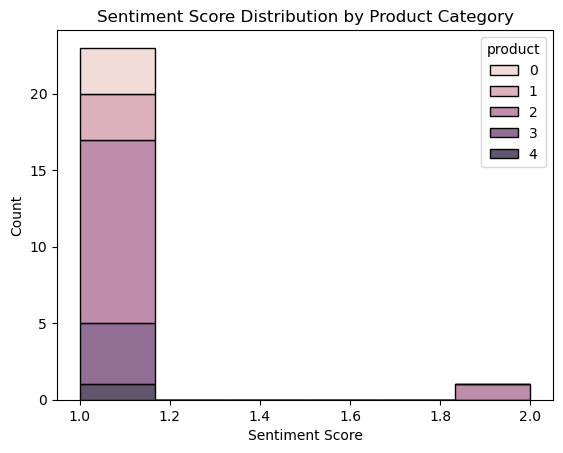

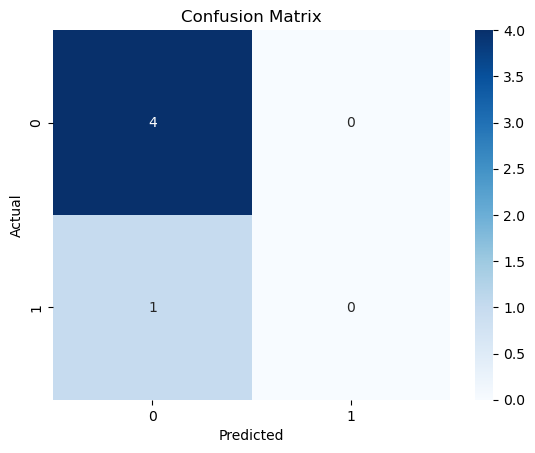

In [17]:
# Visualize sentiment score distribution
sns.histplot(data=df, x='sentiment_score', hue='product', multiple='stack')
plt.title('Sentiment Score Distribution by Product Category')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

# Plot confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
